In [102]:
%run config.py
%pylab inline
spitzer_tstart = Time('2017-03-21',format='iso')
spitzer_tstop = Time('2017-04-28',format='iso')
#mi = lmfit.minimize(resid, params, method='Nelder')
#mini = lmfit.Minimizer(logprob, mi.params)

config.py:35: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  times['time'] -= bjd0

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['sample', 'copy', 'mod']
`%matplotlib` prevents importing * from pylab and numpy


In [ ]:

# Armstrong
# Pb = 7.921+0.028 days
# Pc = 11.91 ± 0.12 

# Nespral
# Pb = 7.91923 ± 0.00020
# Pc = 11.90829+0.00233

# Narita
# Pb 7.920994 ± 0.000071 # Narita
# Pc 12.0028 ± 0.0092 # Nartia, however, they note two minima 

# Nartia second minimum
# Pc 11.7748 ± 0.0142

# Sinokoff/Dai
# 7.91940 ± 0.00005
# 11.90715 ± 0.00150

# C1 ~8 2014, so 2.5 years from observations
# Plan: 


In [95]:
# Field 1 observability

res = mini.emcee(burn=1000, steps=5000, params=mi.params,nwalkers=nwalkers,pos=pos)
res.flatchain.to_hdf('chain_K2-19_2.hdf','chain')

In [25]:
#target = FixedTarget.from_name('K2-19')
#target.name = 'K2-19b'
#par = planets.ix['K2-19b']
#T0 = Time(par.T0 + bjd0,format='jd')
#T0_arr = future_transits(par.P,T0,tstart=tstart,tstop=tstop)

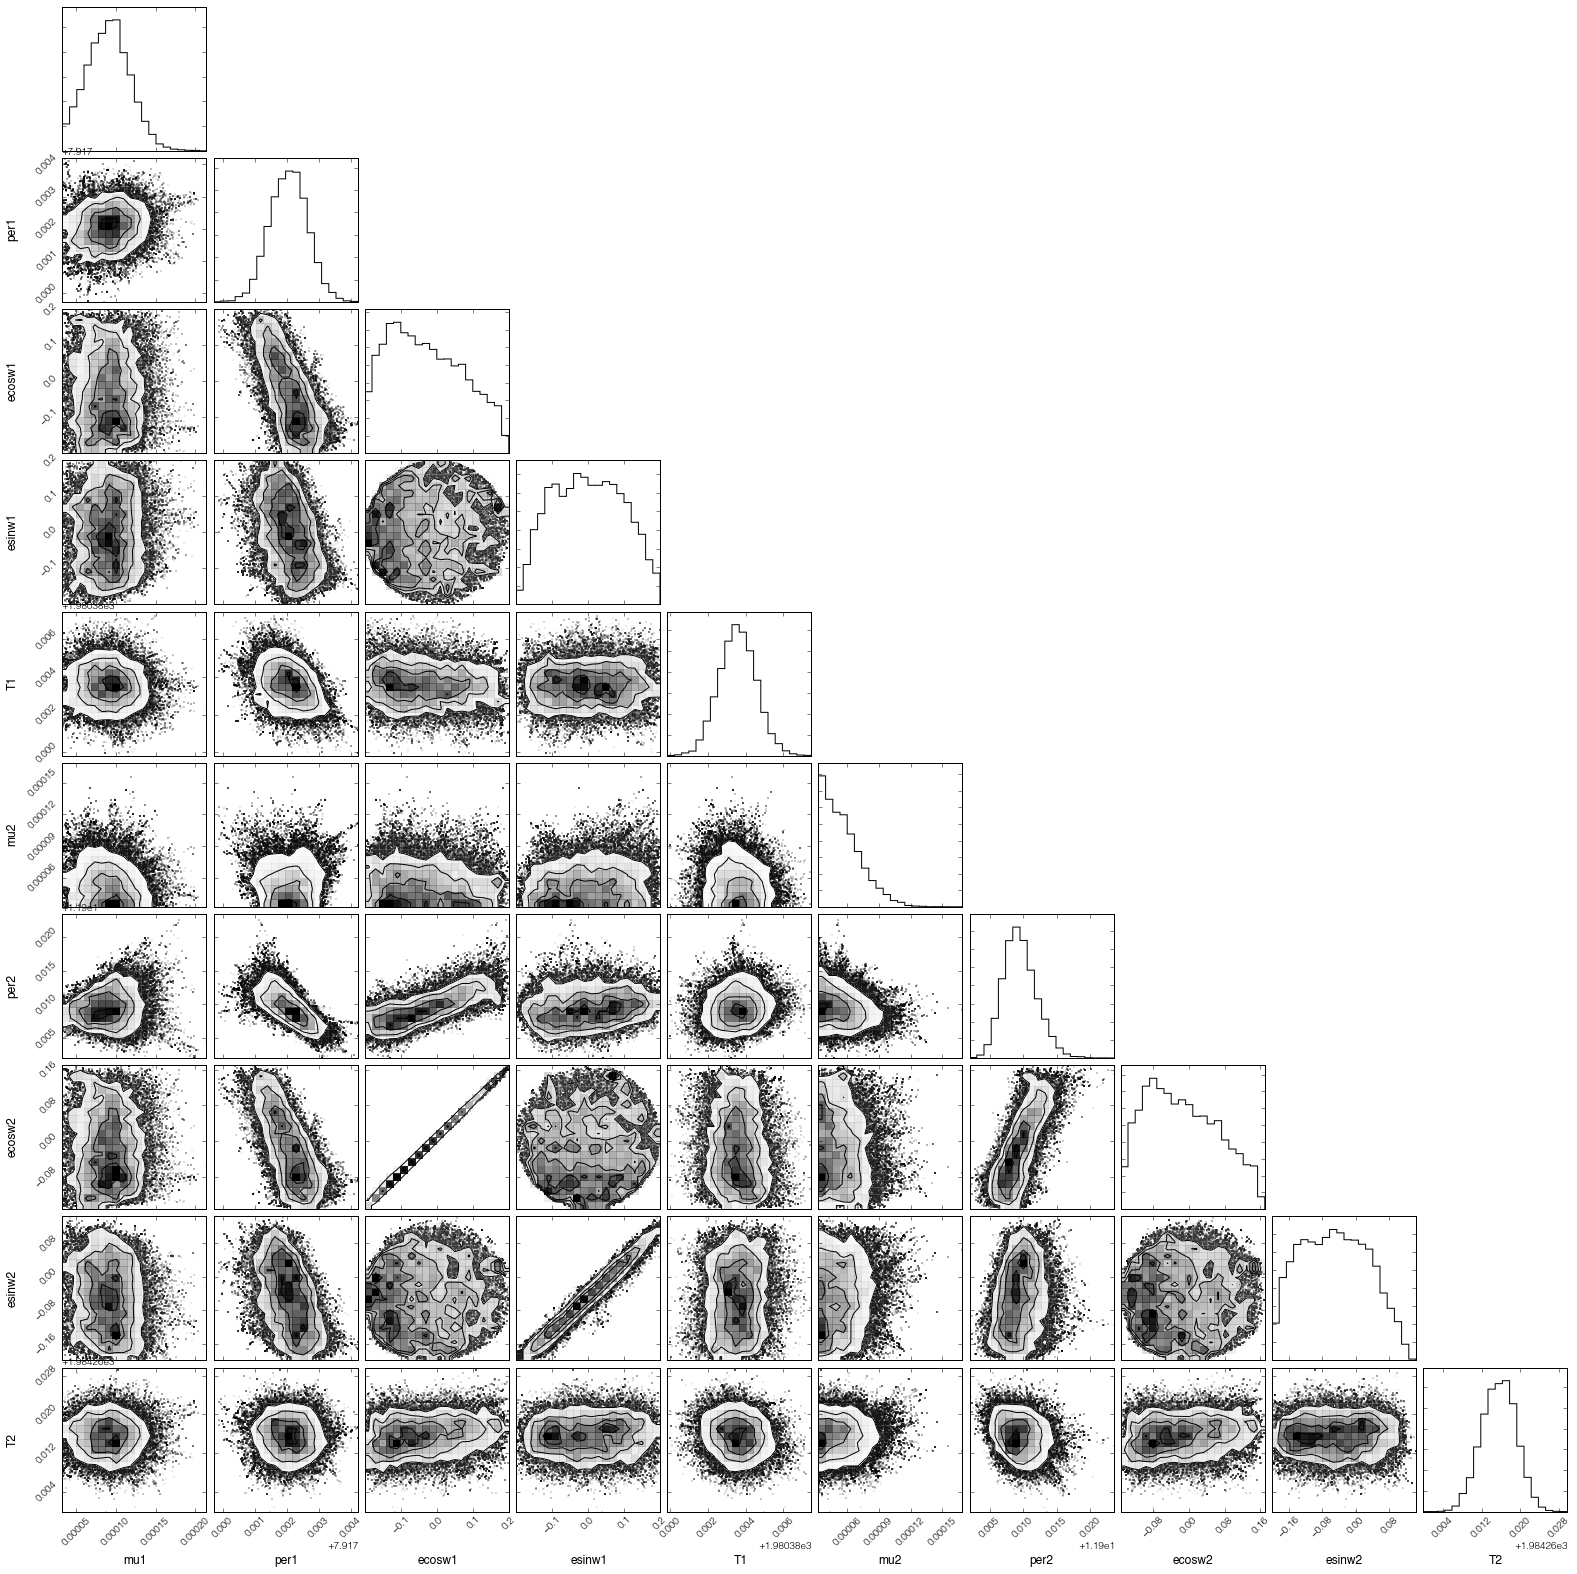

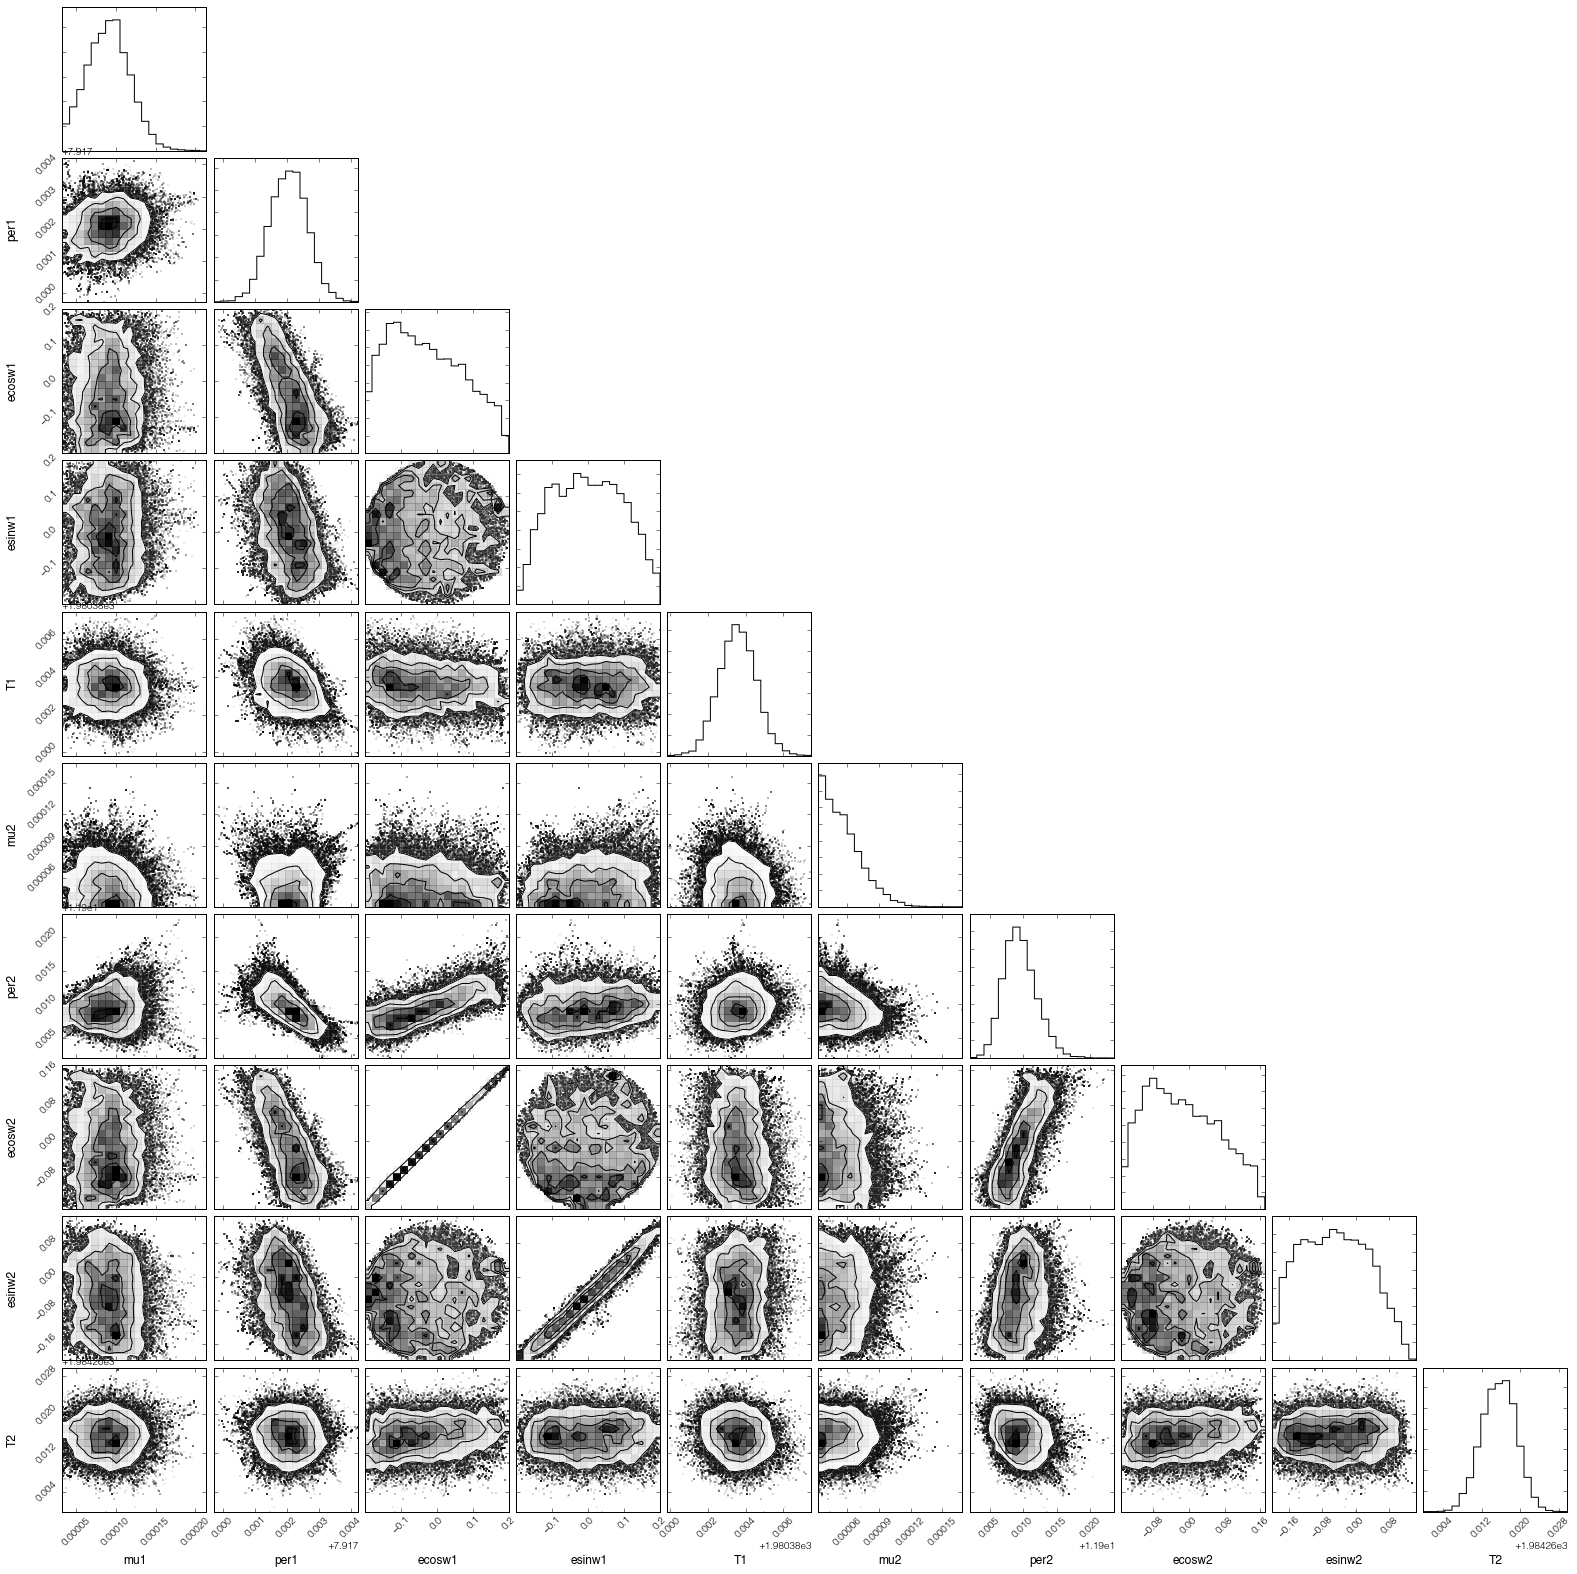

In [103]:
chain = pd.read_hdf('chain_K2-19_2.hdf','chain')
#corner.corner(chain['mu1 mu2'.split()] * Mstar)
corner.corner(chain)

In [228]:
mod.tstop = 3500

In [229]:
chain = pd.read_hdf('chain_K2-19_2.hdf','chain')

# Plot the chain samples
nsamp = 1000
chain_samp = chain.sample(nsamp)
times_mod_arr = []
for i, row in chain_samp.iterrows():
    times_mod = sample(mod,params,row)
    times_mod['chain'] = i
    times_mod_arr += [times_mod]

times_mod_arr = pd.concat(times_mod_arr)
times_mod_arr.to_hdf('K2-19_simulated-times.hdf','times') 

In [230]:
mod.tstop

3500

In [231]:
times_mod = pd.read_hdf('K2-19_simulated-times.hdf','times') 

# Plot of predicted transit times given Spitzer ephemeris

In [369]:
1917.2755+2454900-bjd0

1984.2754999999888

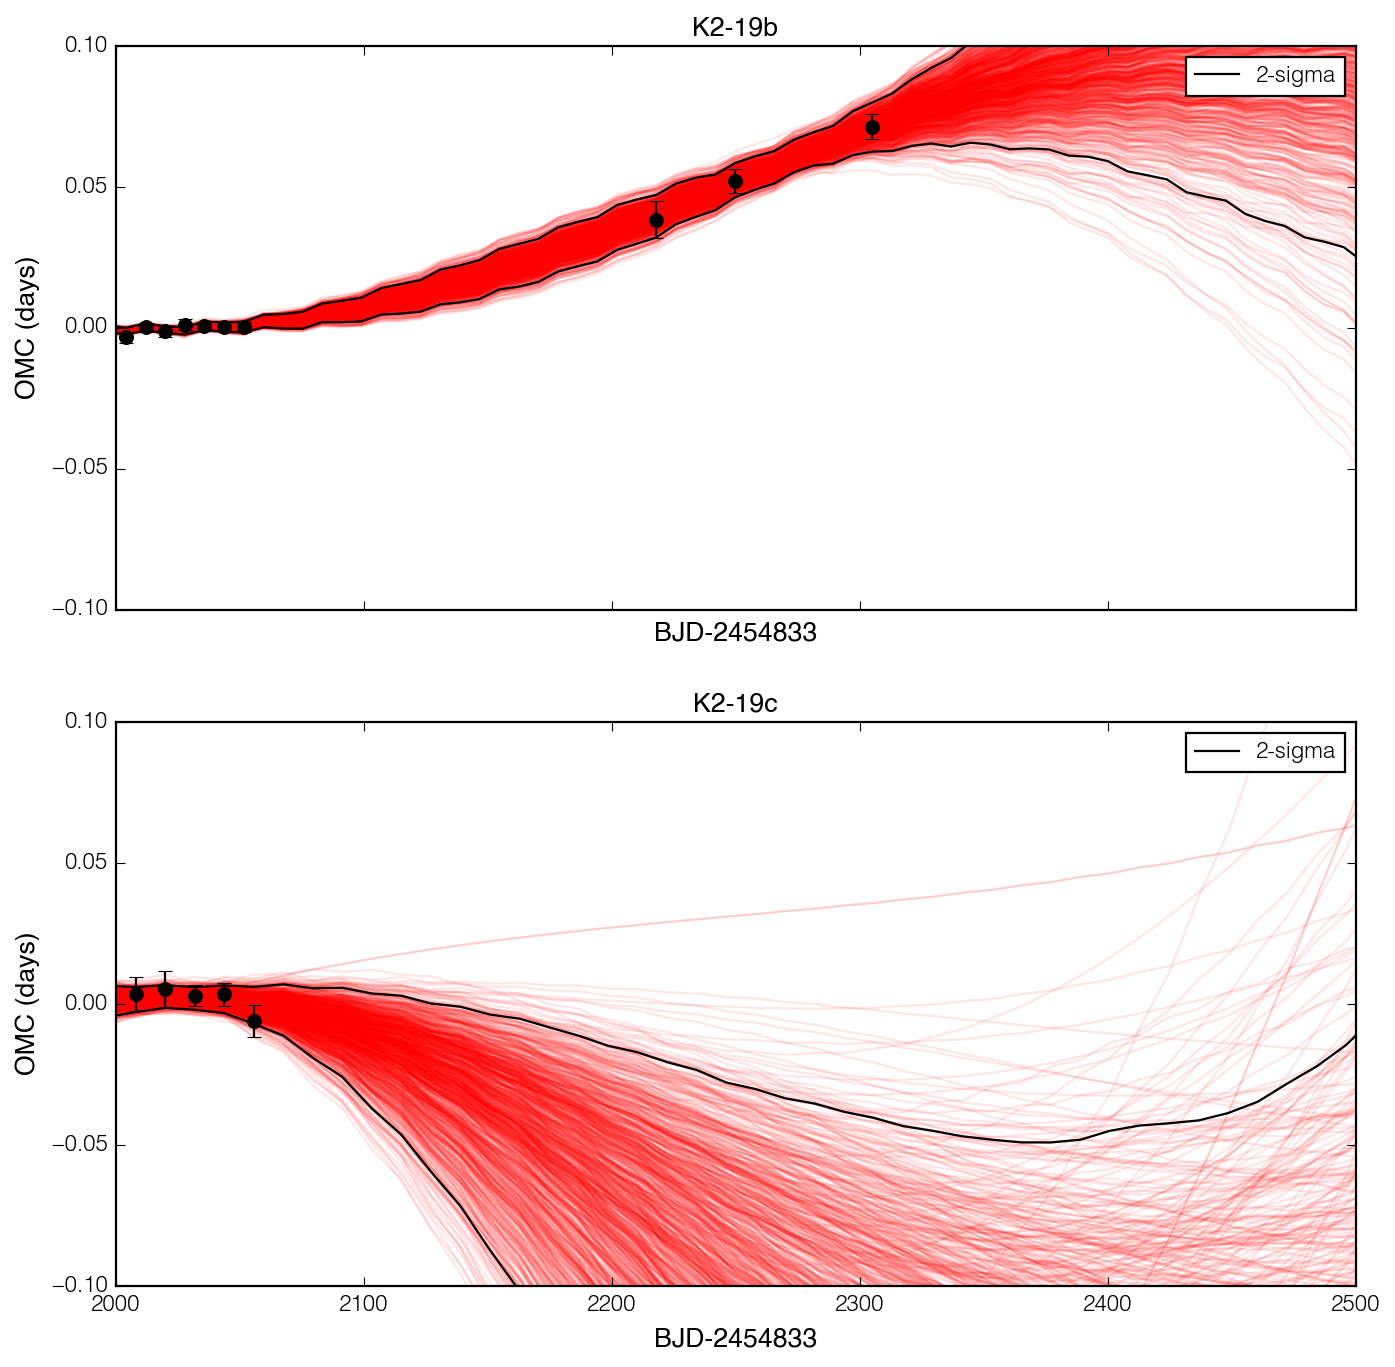

In [252]:
rc('savefig',dpi=160)
omcplot1 = OMCPlot(7.91940,1913.3837+2454900-bjd0) # omc plottter for plannet b
omcplot2 = OMCPlot(11.90715,1917.2755+2454900-bjd0) # omc plottter for plannet c

fig, axL = subplots(nrows=2,sharex=True,sharey=False,figsize=(10,10))
# Plot the best fit periods
# Nespral
# Pb = 7.91923 ± 0.00020
# Pc = 11.90829+0.00233
# Plot the chain samples
omcL = [omcplot1,omcplot2]

for i in range(2):
    sca(axL[i])
    omcplot = omcL[i]
    times_i = times[times.i_planet==(i+1)]
    omcplot.errorbar(times_i.i_epoch, times_i.time, fmt='ok',yerr=times_i.time_err,zorder=10)
    times_mod_i = np.array(times_mod[times_mod.i_planet==(i+1)].time).reshape(nsamp,-1)
    i_epoch = arange(times_mod_i.shape[1])
    omcplot.plot(i_epoch.T, times_mod_i.T,color='r',alpha=0.1)
    quant = np.percentile(times_mod_i,[2.5,97.5],axis=0)
    lines = omcplot.plot(i_epoch, quant.T,color='k')
    lines[0].set_label('2-sigma')
    legend()
    axvspan(spitzer_tstart.jd-bjd0,spitzer_tstop.jd-bjd0,alpha=0.1)
    xlabel('BJD-%i' % bjd0)
    ylabel('OMC (days)')

xlim(2000,3100)
setp(axL[0],title='K2-19b')
setp(axL[1],title='K2-19c')
gcf().savefig('K2-19_times.pdf')
xlim(2000,2500)
setp(axL,ylim=(-0.1,0.1))
gcf().savefig('K2-19_times-zoom.pdf')

In [367]:
spitzer_tstart_kjd = spitzer_tstart.jd - bjd0 
spitzer_tstop_kjd = spitzer_tstop.jd - bjd0 

times_spitzer = times_mod[(times_mod.i_planet==1) & times_mod.time.between(spitzer_tstart_kjd,spitzer_tstop_kjd)]
g = times_spitzer.groupby('i_epoch',as_index=False)
temp = g.quantile(q=[0.025,0.975])
temp['time'] += bjd0
i_epoch = list(temp.i_epoch.astype(int))
index = [i_epoch,('start stop '*(len(i_epoch)/2)).split()]
temp.index = index

T14 = 4.0/24.0


idx = temp.loc[(slice(None),'start'),'time'].index
temp.ix[idx,'time'] -= 0.5*T14
idx = temp.loc[(slice(None),'stop'),'time'].index
temp.ix[idx,'time'] += 0.5*T14

#temp.loc[(slice(None),'start'),'time'] -= 0.5*T14
#temp.loc[(slice(None),'start'),'time'] += 0.5*T14

print temp[['time']].to_string(float_format=lambda x : "%.6f" % x)

times_spitzer = times_mod[(times_mod.i_planet==2) & times_mod.time.between(spitzer_tstart_kjd,spitzer_tstop_kjd)]
g = times_spitzer.groupby('i_epoch',as_index=False)
temp = g.quantile(q=[0.025,0.975])
temp['time']+=bjd0
i_epoch = list(temp.i_epoch.astype(int))
index = [i_epoch,('start stop '*(len(i_epoch)/2)).split()]
temp.index = index
print temp[['time']].to_string(float_format=lambda x : "%.6f" % x)

                    time
129 start 2457834.870660
    stop  2457835.394349
130 start 2457842.792209
    stop  2457843.318718
131 start 2457850.716201
    stop  2457851.243558
132 start 2457858.637613
    stop  2457859.166115
133 start 2457866.558712
    stop  2457867.090250
                   time
86 start 2457840.273006
   stop  2457841.378812
87 start 2457852.156379
   stop  2457853.268647
88 start 2457864.045515
   stop  2457865.170708


In [365]:
temp.ix[idx]

,,i_planet,i_epoch,time,chain
129,start,NaN,NaN,NaN,NaN
130,start,NaN,NaN,NaN,NaN
131,start,NaN,NaN,NaN,NaN
132,start,NaN,NaN,NaN,NaN
133,start,NaN,NaN,NaN,NaN


In [334]:
idx = pd.IndexSlice


temp.loc[idx[:,['start']]]

KeyError: "None of [['start']] are in the [columns]"

(slice(None, None, None), ['start'])

FrozenList([[86, 87, 88], [0.025, 0.0975]])

In [65]:
import ttv.plotting
,close all

P_plot = dict(b=7.91940,c=11.90715)
T0_plot = dict(b=1913.3837+2454900-bjd0,c=1917.2755+2454900-bjd0)
times1 = times.query('i_planet==1')
ttv.plotting.errorbar_omc(times1.i_epoch, times1.time, P_plot['b'], T0_plot['b'],fmt='.',yerr=times1.time_err)
times2 = times.query('i_planet==2')
ttv.plotting.errorbar_omc(times2.i_epoch, times2.time, P_plot['c'], T0_plot['c'],fmt='.',yerr=times2.time_err)


chain_samp = chain.sample(100)
times_mod1_arr = []
times_mod2_arr = []

for i, row in chain_samp.iterrows():
    times_mod = sample(mod,params,row)
    times_mod1 = times_mod.query('i_planet==1')
    ttv.plotting.errorbar_omc(times_mod1.i_epoch, times_mod1.time, P_plot['b'], T0_plot['b'],color='r',alpha=0.1)
    times_mod2 = times_mod.query('i_planet==2')
    ttv.plotting.errorbar_omc(times_mod2.i_epoch, times_mod2.time, P_plot['c'], T0_plot['c'],color='b',alpha=0.1)

#    times_mod1_arr += times_mod1
#    times_mod1_arr += times_mod1

#times_mod = pd.DataFrame(mod(res.params))
#times_mod1 = times_mod.query('i_planet==1')
#ttv.plotting.errorbar_omc(times_mod1.i_epoch, times_mod1.time, P_plot['b'], T0_plot['b'])
#times_mod2 = times_mod.query('i_planet==2')
#ttv.plotting.errorbar_omc(times_mod2.i_epoch, times_mod2.time, P_plot['c'], T0_plot['c'])
ylim(-0.3,0.3)

(-0.3, 0.3)

In [48]:
# Armstrong
# Pb = 7.921+0.028 days
# Pc = 11.91 ± 0.12 da

# Nespral
# Pb = 7.91923 ± 0.00020
# Pc = 11.90829+0.00233

# Narita
# Pb 7.920994 ± 0.000071 # Narita
# Pc 12.0028 ± 0.0092 # Nartia, however, they note two minima 

# Nartia second minimum
# Pc 11.7748 ± 0.0142

# Sinokoff/Dai
# 7.91940 ± 0.00005
# 11.90715 ± 0.00150

# C1 ~8 2014, so 2.5 years from observations
# Plan: 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


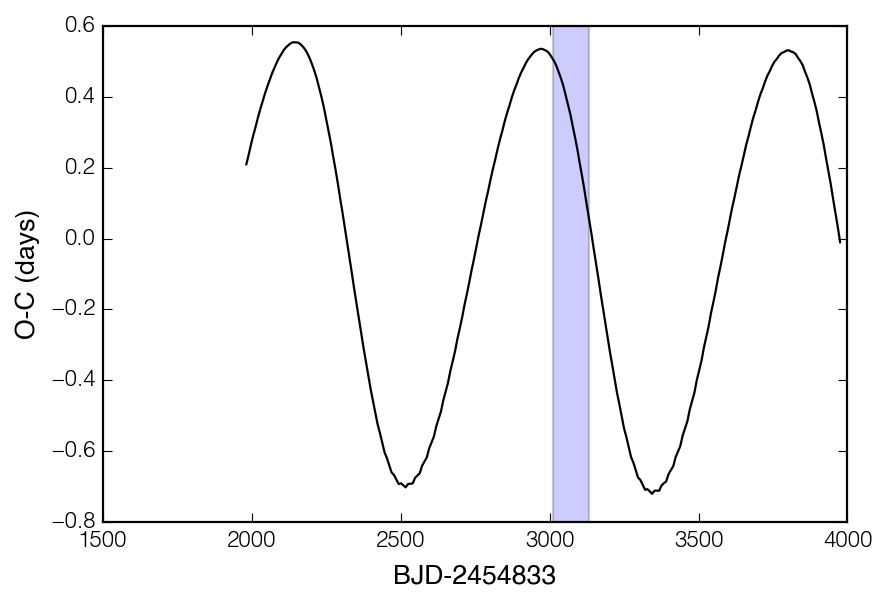

In [9]:
%pylab inline
rc('savefig',dpi=160)
p1 = df[df.i_planet==1]
p2 = df[df.i_planet==2]

#ttv.plotting.plot_omc(p1.i_epoch,p1.time,params['per1'].value+0.00025,params['T1'].value)
per,t0 = np.polyfit(p1.i_epoch,p1.time,1)

ttv.plotting.plot_omc(p1.i_epoch,p1.time,per,t0)

t1 = Time('2017-04-01',format='iso').jd 
t2 = Time('2017-07-31',format='iso').jd 
axvspan(t1- bjd0,t2-bjd0,alpha=0.2)
ylabel('O-C (days)')
xlabel('BJD-2454833')

#ttv.plotting.plot_omc(p2.i_epoch,p2.time,params['per2'].value,params['T2'].value)